# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from decision_tree.ipynb


In [4]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

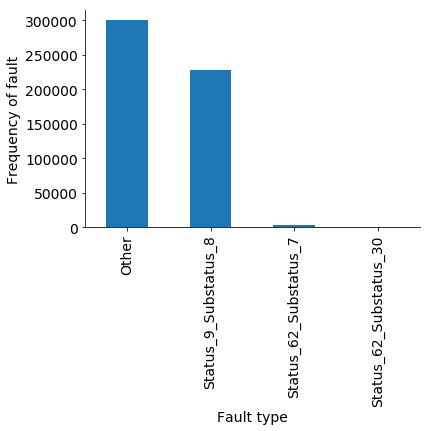

<Figure size 1440x1152 with 0 Axes>

In [5]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [6]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [7]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

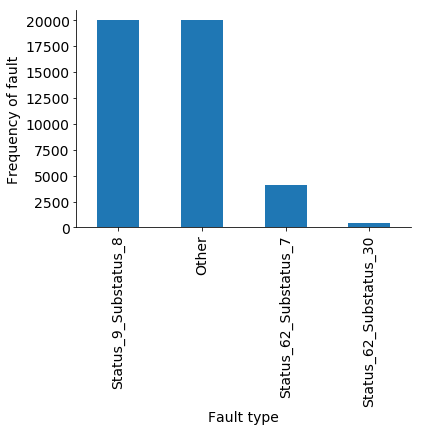

<Figure size 1440x1152 with 0 Axes>

In [8]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [78]:
undersampled_data.head()

TimeStamp  WindVane  WindSpeed  RotorSpeed  NacelleDirection  \
0  21-12-2017 11:58:00     -11.3  13.000000   19.650000             275.0   
1  18-03-2018 09:56:30      -2.0  20.900000   21.129999             247.0   
2  30-11-2018 13:39:30       7.0  11.300000   21.609999             170.0   
3  11-10-2018 11:36:00       1.4  10.000000   19.609999             110.0   
4  05-04-2019 00:44:00     -12.3  20.200001   20.920000              98.0   

   ActivePower  Spinner-Temperature  Log-T-Raw-FrontBearingTemperature  \
0       1792.0                 24.0                               47.0   
1       2252.0                 37.0                               55.0   
2       2059.0                 32.0                               40.0   
3       1567.0                 26.0                               29.0   
4       1523.0                 20.0                               37.0   

   Log-T-Raw-RearBearingTemperature  Log-T-Raw-BladeAPitchHeatSink  ...  \
0                              27.0                           12.0  ...   
1                              27.0                           17.0  ...   
2                              40.0                           18.0  ...   
3                              32.0                           27.0  ...   
4                              29.0                           18.0  ...   

   Log-T-Raw-Rectifier2HeatSink  Log-T-Raw-RectifierCabinetTemperature  \
0                          57.0                                   18.0   
1                          53.0                                   15.0   
2                          44.0                                   20.0   
3                          55.0                                   31.0   
4                          52.0                                   27.0   

   Log-T-Raw-ExcitationHeatSink  Ambient-Temperature  \
0                          30.0                 13.0   
1                          26.0                  9.0   
2                          37.0                 11.0   
3                          50.0                 17.0   
4                          48.0                  5.0   

   Log-T-Raw-TowerTemperature  Log-T-Raw-ControlCabinetTemperature  \
0                        37.0                                 39.0   
1                        33.0                                 33.0   
2                        32.0                                 34.0   
3                        30.0                                 29.0   
4                        19.0                                 25.0   

   Log-T-Raw-TransformerTemperature  Average blade angle across A B C  \
0                              83.0                          6.360000   
1                              83.0                         17.469999   
2                              70.0                          3.750000   
3                              41.0                          1.000000   
4                              42.0                         16.740000   

   WindDirection                 Status  
0     263.700012                  Other  
1     245.000000  Status_62_Substatus_7  
2     177.000000  Status_62_Substatus_7  
3     111.400002   Status_9_Substatus_8  
4      85.699997                  Other  

[5 rows x 36 columns]

In [9]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [10]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [11]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [84]:
columns_for_data = X_train.columns

In [12]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [13]:
y_test.value_counts()

Other                     6600
Status_9_Substatus_8      6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.83939394e-01 1.51515152e-04 3.93939394e-03 1.19696970e-02]
 [2.20472441e-01 7.63779528e-01 0.00000000e+00 1.57480315e-02]
 [7.39644970e-04 0.00000000e+00 9.99260355e-01 0.00000000e+00]
 [1.21212121e-02 0.00000000e+00 0.00000000e+00 9.87878788e-01]]


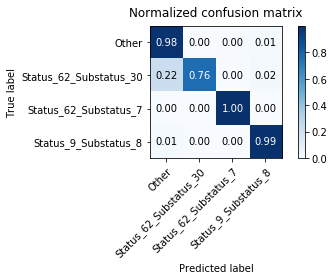

Total Accuracy 		0.985

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.983 		 0.984 		 0.984
Status_62_Substatus_30    	 0.990 		 0.764 		 0.862
Status_62_Substatus_7     	 0.981 		 0.999 		 0.990
Status_9_Substatus_8      	 0.988 		 0.988 		 0.988


In [14]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [15]:
rf

importance
ActivePower                                   0.162246
Log-T-Raw-Rectifier1HeatSink                  0.079018
Log-T-Raw-TransformerTemperature              0.064247
Log-T-Raw-Rotor1Temperature                   0.052163
Log-T-Raw-Stator2Temperature                  0.049741
Log-T-Raw-Rotor2Temperature                   0.043470
Log-T-Raw-Rectifier2HeatSink                  0.040850
Log-T-Raw-Stator1Temperature                  0.034672
Log-T-Raw-NacelleAmbientTemperature           0.033874
Log-T-Raw-RearBearingTemperature              0.033274
RotorSpeed                                    0.032135
Log-T-Raw-ControlCabinetTemperature           0.031367
Spinner-Temperature                           0.028773
Ambient-Temperature                           0.026549
Log-T-Raw-RectifierCabinetTemperature         0.026027
Average blade angle across A B C              0.025780
NacelleDirection                              0.023439
Log-T-Raw-ExcitationHeatSink                  0.023434
Nacelle-Temperature                           0.020848
Log-T-Raw-TowerTemperature                    0.020584
Log-T-Raw-FrontBearingTemperature             0.019434
WindDirection                                 0.015859
Log-T-Raw-BladeAPitchControlBox               0.014762
Log-T-Raw-BladeAPitchHeatSink                 0.014660
Log-T-Raw-NacelleControlCabinetTemperature    0.014016
WindSpeed                                     0.013556
Log-T-Raw-BladeBPitchControlBox               0.012047
Log-T-Raw-BladeCPitchControlBox               0.010564
Log-T-Raw-BladeCPitchHeatSink                 0.009786
Log-T-Raw-BladeBPitchHeatSink                 0.008842
WindVane                                      0.005144
Log-T-Raw-BladeBTemperature                   0.004254
Log-T-Raw-BladeATemperature                   0.002368
Log-T-Raw-BladeCTemperature                   0.002217

## Scale dataset for SVM

In [90]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()


(29802, 34)
(14679, 34)


WindVane  WindSpeed  RotorSpeed  NacelleDirection  ActivePower  \
0  0.492820   0.196721    0.765994          0.345404     0.327923   
1  0.514072   0.136612    0.513954          0.387187     0.000000   
2  0.475589   0.073770    0.294547          0.735376     0.002913   
3  0.479609   0.554645    0.935165          0.707521     0.957137   
4  0.489948   0.480874    0.905968          0.373259     0.986683   

   Spinner-Temperature  Log-T-Raw-FrontBearingTemperature  \
0             0.600000                           0.709302   
1             0.546667                           0.569767   
2             0.586667                           0.581395   
3             0.826667                           0.941860   
4             0.666667                           0.639535   

   Log-T-Raw-RearBearingTemperature  Log-T-Raw-BladeAPitchHeatSink  \
0                          0.370130                       0.564706   
1                          0.318182                       0.505882   
2                          0.311688                       0.576471   
3                          0.337662                       0.541176   
4                          0.305195                       0.482353   

   Log-T-Raw-BladeBPitchHeatSink  ...  Log-T-Raw-Rectifier1HeatSink  \
0                       0.547619  ...                      0.655556   
1                       0.511905  ...                      0.833333   
2                       0.607143  ...                      0.388889   
3                       0.595238  ...                      0.755556   
4                       0.535714  ...                      0.655556   

   Log-T-Raw-Rectifier2HeatSink  Log-T-Raw-RectifierCabinetTemperature  \
0                      0.686747                               0.550000   
1                      0.927711                               0.583333   
2                      0.433735                               0.550000   
3                      0.795181                               0.316667   
4                      0.650602                               0.333333   

   Log-T-Raw-ExcitationHeatSink  Ambient-Temperature  \
0                      0.468085                 0.36   
1                      0.457447                 0.20   
2                      0.276596                 0.54   
3                      0.287234                 0.48   
4                      0.329787                 0.34   

   Log-T-Raw-TowerTemperature  Log-T-Raw-ControlCabinetTemperature  \
0                    0.481928                             0.345455   
1                    0.361446                             0.309091   
2                    0.530120                             0.436364   
3                    0.698795                             0.600000   
4                    0.662651                             0.581818   

   Log-T-Raw-TransformerTemperature  Average blade angle across A B C  \
0                          0.330097                          0.000000   
1                          0.213592                          0.069635   
2                          0.339806                          0.000000   
3                          0.796117                          0.144012   
4                          0.669903                          0.101541   

   WindDirection  
0       0.704319  
1       0.549211  
2       0.780939  
3       0.763081  
4       0.521387  

[5 rows x 34 columns]

## SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.43409091 0.29333333 0.12954545 0.1430303 ]
 [0.25984252 0.55905512 0.05511811 0.12598425]
 [0.03180473 0.04659763 0.87721893 0.0443787 ]
 [0.13651515 0.22272727 0.01469697 0.62606061]]


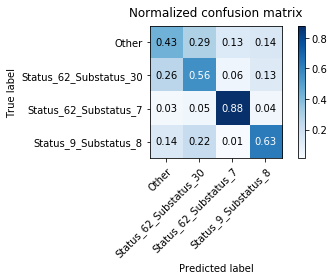

Plotting Performance Measure...
Total Accuracy 		0.562

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.746 		 0.434 		 0.549
Status_62_Substatus_30    	 0.020 		 0.559 		 0.039
Status_62_Substatus_7     	 0.553 		 0.877 		 0.678
Status_9_Substatus_8      	 0.802 		 0.626 		 0.703


In [17]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[8.54393939e-01 0.00000000e+00 1.01515152e-02 1.35454545e-01]
 [8.42519685e-01 0.00000000e+00 0.00000000e+00 1.57480315e-01]
 [5.16272189e-01 0.00000000e+00 4.39349112e-01 4.43786982e-02]
 [3.50151515e-01 0.00000000e+00 3.03030303e-04 6.49545455e-01]]


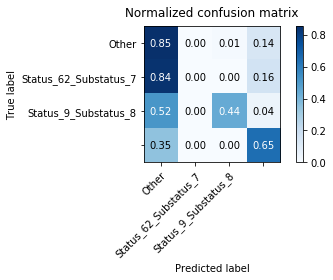

Plotting Performance Measure...
Total Accuracy 		0.717

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.644 		 0.854 		 0.734
Status_62_Substatus_7     	 0.896 		 0.439 		 0.590
Status_9_Substatus_8      	 0.815 		 0.650 		 0.723


In [18]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [20]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

0.510626    326
0.476738    324
0.491097    296
0.502872    291
0.497702    288
           ... 
0.481462      1
0.501467      1
0.516009      1
0.516160      1
0.517561      1
Name: 0, Length: 20194, dtype: int64

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.48606061 0.29893939 0.10924242 0.10575758]
 [0.30636364 0.59333333 0.04681818 0.05348485]
 [0.02742424 0.00151515 0.92484848 0.04621212]
 [0.13712121 0.22984848 0.01333333 0.61969697]]


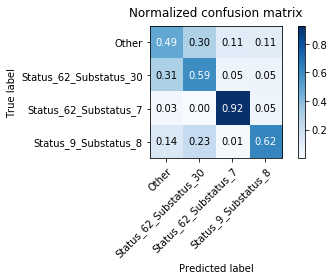

Plotting Performance Measure...
Total Accuracy 		0.656

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.508 		 0.486 		 0.497
Status_62_Substatus_30    	 0.528 		 0.593 		 0.559
Status_62_Substatus_7     	 0.845 		 0.925 		 0.883
Status_9_Substatus_8      	 0.751 		 0.620 		 0.679


In [21]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.43409091 0.29333333 0.12954545 0.1430303 ]
 [0.25984252 0.55905512 0.05511811 0.12598425]
 [0.03180473 0.04659763 0.87721893 0.0443787 ]
 [0.13651515 0.22272727 0.01469697 0.62606061]]


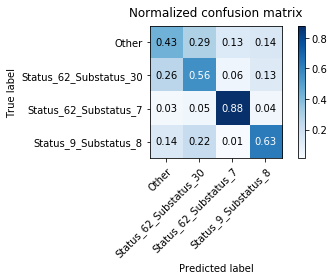

Plotting Performance Measure...
Total Accuracy 		0.562

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.746 		 0.434 		 0.549
Status_62_Substatus_30    	 0.020 		 0.559 		 0.039
Status_62_Substatus_7     	 0.553 		 0.877 		 0.678
Status_9_Substatus_8      	 0.802 		 0.626 		 0.703


In [22]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

## Decision tree model

In [29]:
# Remove the features from the random forest model called rf



(14679, 34)

Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[9.50757576e-01 7.42424242e-03 6.21212121e-03 3.56060606e-02]
 [1.25984252e-01 8.74015748e-01 0.00000000e+00 0.00000000e+00]
 [8.13609467e-03 0.00000000e+00 9.91863905e-01 0.00000000e+00]
 [2.01515152e-02 7.57575758e-04 4.54545455e-04 9.78636364e-01]]


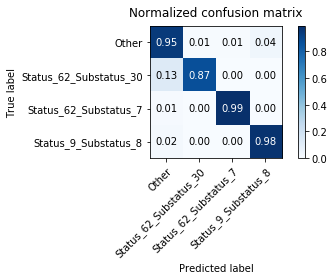

Plotting Performance Measure...
Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.975 		 0.951 		 0.963
Status_62_Substatus_30    	 0.673 		 0.874 		 0.760
Status_62_Substatus_7     	 0.968 		 0.992 		 0.980
Status_9_Substatus_8      	 0.965 		 0.979 		 0.972
<class 'sklearn.tree.tree.DecisionTreeClassifier'>


In [33]:
dt = decision_tree.get_decision_tree_model(X_train_scaled, X_test_scaled, y_train, y_test)


In [48]:
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()

index  importance
0                       ActivePower    0.162246
1      Log-T-Raw-Rectifier1HeatSink    0.079018
2  Log-T-Raw-TransformerTemperature    0.064247
3       Log-T-Raw-Rotor1Temperature    0.052163
4      Log-T-Raw-Stator2Temperature    0.049741
5       Log-T-Raw-Rotor2Temperature    0.043470

In [52]:
include_features = rf_df_extracted.index

In [97]:
import numpy as np
type(include_features.tolist())
list_of_features = include_features.tolist()

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]


X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

ActivePower  Log-T-Raw-Rectifier1HeatSink  \
0     0.000000                      0.833333   
1     0.282147                      0.666667   
2     0.017478                      0.555556   
3     0.054515                      0.722222   
4     0.038702                      0.722222   

   Log-T-Raw-TransformerTemperature  Log-T-Raw-Rotor1Temperature  \
0                          0.368932                     0.203791   
1                          0.368932                     0.308057   
2                          0.242718                     0.127962   
3                          0.485437                     0.270142   
4                          0.456311                     0.222749   

   Log-T-Raw-Stator2Temperature  Log-T-Raw-Rotor2Temperature  
0                      0.497143                     0.204762  
1                      0.582857                     0.304762  
2                      0.382857                     0.123810  
3                      0.548571                     0.271429  
4                      0.485714                     0.214286

In [104]:
# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

Selected features for decision tree
0                         ActivePower
1        Log-T-Raw-Rectifier1HeatSink
2    Log-T-Raw-TransformerTemperature
3         Log-T-Raw-Rotor1Temperature
4        Log-T-Raw-Stator2Temperature
5         Log-T-Raw-Rotor2Temperature

Loading DT..
Training DT...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[8.84393939e-01 8.18181818e-03 1.13636364e-02 9.60606061e-02]
 [1.49606299e-01 8.11023622e-01 0.00000000e+00 3.93700787e-02]
 [3.55029586e-02 0.00000000e+00 9.60798817e-01 3.69822485e-03]
 [7.04545455e-02 6.06060606e-04 2.12121212e-03 9.26818182e-01]]


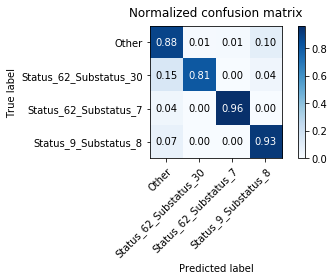

Plotting Performance Measure...
Total Accuracy 		0.910

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.916 		 0.884 		 0.900
Status_62_Substatus_30    	 0.640 		 0.811 		 0.715
Status_62_Substatus_7     	 0.936 		 0.961 		 0.948
Status_9_Substatus_8      	 0.905 		 0.927 		 0.916


In [105]:
# Train DT on these features and print it out:
dt = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train, y_test)

In [ ]:
# Print the tree